In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
q = 1.6e-19  # Charge of the electron (Coulombs)
m = 9.11e-31  # Mass of the electron (kg)
B = np.array([0, 1, 1])  # Magnetic field
E = np.array([0, 1, 1])  # E field

In [47]:
#return vector of dv/dt from lorentz force and initial velocity
def f(v,t): 
    vx = v[0]
    vy = v[1]
    vz = v[2]
    fx = (q/m)*(E[0] + (vy * B[2]) - (vz * B[1]))
    fy = (q/m)*(E[1] + (vz * B[0]) - (vx * B[2]))
    fz = (q/m)*(E[2] + (vx * B[1]) - (vy * B[0]))
    return np.array([fx,fy, fz],float)

In [48]:
a = 0.0
b = 10.0
N = 100
h = (b-a)/N

In [49]:
tpoints = np.arange(a,b,h)
v = np.zeros((N,3))
v[0] = [1.0, 1.0, 1.0]

In [12]:
for i in range(3):
    print(i)

0
1
2


In [50]:
for i,t in enumerate(tpoints[1:],1):
    k1 = h * f(v[i-1], t)
    k2 = h * f(v[i-1]+0.5*k1, t+0.5*h)
    k3 = h * f(v[i-1]+0.5*k2, t+0.5*h)
    k4 = h * f(v[i-1]+k3, t+h)
    v[i] = v[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

/var/folders/cr/26_fdgqx001_x85910x6vll40000gn/T/ipykernel_77356/1495619009.py:7: RuntimeWarning: overflow encountered in scalar multiply
  fy = (q/m)*(E[1] + (vz * B[0]) - (vx * B[2]))
/var/folders/cr/26_fdgqx001_x85910x6vll40000gn/T/ipykernel_77356/1495619009.py:8: RuntimeWarning: overflow encountered in scalar multiply
  fz = (q/m)*(E[2] + (vx * B[1]) - (vy * B[0]))
/var/folders/cr/26_fdgqx001_x85910x6vll40000gn/T/ipykernel_77356/1495619009.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  fy = (q/m)*(E[1] + (vz * B[0]) - (vx * B[2]))
/var/folders/cr/26_fdgqx001_x85910x6vll40000gn/T/ipykernel_77356/1495619009.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  fz = (q/m)*(E[2] + (vx * B[1]) - (vy * B[0]))


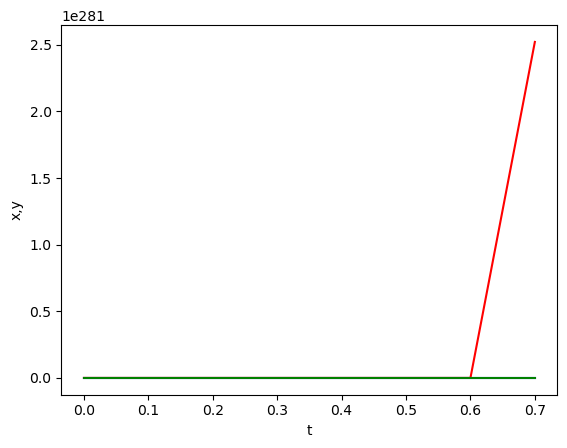

In [54]:
plt.plot(tpoints, v[:,0], label='x', color = 'r')
plt.plot(tpoints, v[:,1], label='y', color = 'b')
plt.plot(tpoints, v[:,2], label='z', color = 'g')
plt.xlabel("t")
plt.ylabel("x,y")
plt.show()